In [1]:
import numpy as np

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# data manager and analysis
import vodex as vx
import numan as nu

# writing files
import tifffile as tif

# Define experiment:
First get the files + frames + volume information with volume manager

In [2]:
project_dir = 'D:/Code/repos/vodex/data/test/test_movie/'
frames_per_volume = 10

volume_m = vx.VolumeManager.from_dir(project_dir, frames_per_volume)
volume_m

Total frames : 42
Volumes start on frame : 0
Total good volumes : 4
Frames per volume : 10
Tailing frames (not a full volume , at the end) : 2

In [3]:
shape = vx.Labels("shape", ["c", "s"],
                    group_info="Information about the shape on the screen",
                    state_info={"c": "circle", "s": "square"})
light = vx.Labels("light", ["on", "off"],
                    group_info="Information about the light",
                    state_info={"on": "light is on",
                                "off": "light is off"})
cnum = vx.Labels("c label", ['c1', 'c2', 'c3'],
                 group_info="C label on the screen",
                 state_info={'c1': 'written c1',
                             'c2': 'written c1',
                             'c3': 'written c3'})
print(shape)
print(light)
print(cnum)

Label group : shape
States:
c : circle. Group: shape
s : square. Group: shape

Label group : light
States:
on : light is on. Group: light
off : light is off. Group: light

Label group : c label
States:
c1 : written c1. Group: c label
c2 : written c1. Group: c label
c3 : written c3. Group: c label



In [4]:
# Cycle (you need to specify the time coverage for one cycle only)
# it takes two arguments:
# the order of the labels in the cycle
# and
# the timing of each label presentation (in frames )
shape_cycle = vx.Cycle(
    [shape.c, shape.s, shape.c],
    [5, 10, 5]
)
cnum_cycle = vx.Cycle(
    [cnum.c1, cnum.c2, cnum.c3],
    [10, 10, 10]
)

# Timeline (you need to specify the time coverage for the whole recording)
# specify the order in which the labels follow
# and
# the timing of each label presentations ( in frames )
light_tml = vx.Timeline(
    [light.off, light.on, light.off],
    [10, 20, 12]
)

print(shape_cycle)
print(cnum_cycle)
print(light_tml)

Cycle : shape
Length: 20
Label c: for 5 frames
Label s: for 10 frames
Label c: for 5 frames

Cycle : c label
Length: 30
Label c1: for 10 frames
Label c2: for 10 frames
Label c3: for 10 frames

Timeline : light
Length: 42
Label off: for 10 frames
Label on: for 20 frames
Label off: for 12 frames



In [5]:
# annotations use the labels, cycle or timing and total number of frames
# you can get the total number of frames in the recording from the volume manager :
n_frames = volume_m.n_frames # 42
shape_an = vx.Annotation.from_cycle(n_frames, shape, shape_cycle)
cnum_an = vx.Annotation.from_cycle(n_frames, cnum, cnum_cycle)
light_an = vx.Annotation.from_timeline(n_frames, light, light_tml)

print(shape_an)
print(cnum_an)
print(light_an)

Annotation type: shape
Total frames : 42

Annotation type: c label
Total frames : 42

Annotation type: light
Total frames : 42



In [6]:
# finally put all the information together
experiment = vx.Experiment.create(volume_m, [shape_an, cnum_an, light_an], verbose = True)

Image files information :

files directory: D:\Code\repos\vodex\data\test\test_movie
files [number of frames]: 
0) mov0.tif [7]
1) mov1.tif [18]
2) mov2.tif [17]

Total frames : 42
Volumes start on frame : 0
Total good volumes : 4
Frames per volume : 10
Tailing frames (not a full volume , at the end) : 2

Annotation type: shape
Total frames : 42

Timeline : shape
Length: 42
Label c: for 5 frames
Label s: for 10 frames
Label c: for 10 frames
Label s: for 10 frames
Label c: for 7 frames

Annotation type: c label
Total frames : 42

Timeline : c label
Length: 42
Label c1: for 10 frames
Label c2: for 10 frames
Label c3: for 10 frames
Label c1: for 10 frames
Label c2: for 2 frames

Annotation type: light
Total frames : 42

Timeline : light
Length: 42
Label off: for 10 frames
Label on: for 20 frames
Label off: for 12 frames



# Create dff movie

In [7]:
save_dir = 'D:/Code/repos/numan/data/test/dff/'
batch_size = 3 # in volumes
window_size = 3 # in volumes
nu.Preprocess(experiment).batch_dff(save_dir,batch_size, window_size, verbose=True )

written frames : 0 - 1, out of 4
written frames : 2 - 3, out of 4


D:\Code\repos\numan\src\numan\analysis.py:702: UserWarning: The are some frames at the end of the recording that don't correspond to a full volume and will be dropped.
  warnings.warn(f"The are some frames at the end of the recording "
D:\Code\repos\numan\src\numan\utils.py:72: UserWarning: 178092 baseline values are zero.
Setting these values to 10^(-6) to avoid dividing by zero.
  warnings.warn(f"{np.sum(b_zero)} baseline values are zero.\n"
D:\Code\repos\numan\src\numan\utils.py:72: UserWarning: 177477 baseline values are zero.
Setting these values to 10^(-6) to avoid dividing by zero.
  warnings.warn(f"{np.sum(b_zero)} baseline values are zero.\n"


# Create T-Score Image

## get the volumes corresponding to different conditions
You can ask for different combinations of labels, using "and" or "or" logic

In [8]:
# indexes of the volumes to load
c_idx = experiment.choose_volumes([("shape","c")])
s_idx = experiment.choose_volumes([("shape","s")])

c1_idx = experiment.choose_volumes([("c label","c1")])
c2_idx = experiment.choose_volumes([("c label","c2")])
c3_idx = experiment.choose_volumes([("c label","c3")])

on_idx = experiment.choose_volumes([("light","on")])
off_idx = experiment.choose_volumes([("light","off")])

on_and_c2_idx = experiment.choose_volumes([("light","on"),("c label","c2")], logic = "and")
on_or_c2_idx = experiment.choose_volumes([("light","on"),("c label","c2")], logic = "or")

print(f"Full volumes corresponding to specific shape: {c_idx}, {s_idx}. "
      f"There are no such volumes!")
print(f"Full volumes corresponding to specific c_label: {c1_idx}, {c2_idx}, {c3_idx}")
print(f"Full volumes corresponding to specific light: {on_idx}, {off_idx}")

print(f"Full volumes corresponding to light on AND c_label c2: {on_and_c2_idx}")
print(f"Full volumes corresponding to light on OR c_label c2: {on_or_c2_idx}")

Full volumes corresponding to specific shape: [], []. There are no such volumes!
Full volumes corresponding to specific c_label: [0, 3], [1], [2]
Full volumes corresponding to specific light: [1, 2], [0, 3]
Full volumes corresponding to light on AND c_label c2: [1]
Full volumes corresponding to light on OR c_label c2: [1, 2]


Let's assume we want to build a t-score based on c label:

In [9]:
# load the volumes 
c1_volumes = experiment.load_volumes(c1_idx, verbose = True)
c2_volumes = experiment.load_volumes(c2_idx, verbose = True)
c3_volumes = experiment.load_volumes(c3_idx, verbose = True)
c1_volumes.shape

100%|██████████| 10/10 [00:00<00:00, 2506.16frames/s]


(2, 10, 200, 200)

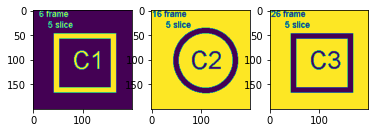

In [10]:
# check a random slice of a volume, make sure it looks as expected ...
plt.subplot(1,3,1);
plt.imshow(c1_volumes[0,5,:,:]);
plt.subplot(1,3,2);
plt.imshow(c2_volumes[0,5,:,:]);
plt.subplot(1,3,3);
plt.imshow(c3_volumes[0,5,:,:]);

### Now set the dff as data :

In [11]:
# get information about the frames and volumes in the new movie:
project_dir = 'D:/Code/repos/numan/data/test/dff/'
volume_m = vx.VolumeManager.from_dir(project_dir, frames_per_volume)
volume_m

Total frames : 40
Volumes start on frame : 0
Total good volumes : 4
Frames per volume : 10
Tailing frames (not a full volume , at the end) : 0

In [12]:
# Note that the number of frames changed!
# That is because we dropped some frames at the end
# ( that were not enough to make a full volume)
# The cycles will automatically cover all the frames in the movie,
# but the Timeline needs to be manually adjusted:
light_tml = vx.Timeline(
    [light.off, light.on, light.off],
    [10, 20, 10]
)

n_frames = volume_m.n_frames # 40
shape_an = vx.Annotation.from_cycle(n_frames, shape, shape_cycle)
cnum_an = vx.Annotation.from_cycle(n_frames, cnum, cnum_cycle)
light_an = vx.Annotation.from_timeline(n_frames, light, light_tml)

experiment = vx.Experiment.create(volume_m, [shape_an, cnum_an, light_an], verbose = True)

Image files information :

files directory: D:\Code\repos\numan\data\test\dff
files [number of frames]: 
0) dff_movie_0000.tif [20]
1) dff_movie_0001.tif [20]

Total frames : 40
Volumes start on frame : 0
Total good volumes : 4
Frames per volume : 10
Tailing frames (not a full volume , at the end) : 0

Annotation type: shape
Total frames : 40

Timeline : shape
Length: 40
Label c: for 5 frames
Label s: for 10 frames
Label c: for 10 frames
Label s: for 10 frames
Label c: for 5 frames

Annotation type: c label
Total frames : 40

Timeline : c label
Length: 40
Label c1: for 10 frames
Label c2: for 10 frames
Label c3: for 10 frames
Label c1: for 10 frames

Annotation type: light
Total frames : 40

Timeline : light
Length: 40
Label off: for 10 frames
Label on: for 20 frames
Label off: for 10 frames



Let's have a look at the images that correspond to the c1, c2 and c3 after dff :

100%|██████████| 10/10 [00:00<00:00, 3305.99frames/s]


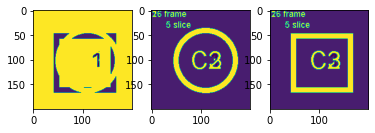

In [13]:
c1_idx = experiment.choose_volumes([("c label","c1")])
c2_idx = experiment.choose_volumes([("c label","c2")])
c3_idx = experiment.choose_volumes([("c label","c3")])

# load the volumes
c1_volumes = experiment.load_volumes(c1_idx, verbose = True)
c2_volumes = experiment.load_volumes(c2_idx, verbose = True)
c3_volumes = experiment.load_volumes(c3_idx, verbose = True)

# check a random slice of a volume, make sure it looks as expected ...
plt.subplot(1,3,1);
plt.imshow(c1_volumes[0,5,:,:]);
plt.subplot(1,3,2);
plt.imshow(c2_volumes[0,5,:,:]);
plt.subplot(1,3,3);
plt.imshow(c3_volumes[0,5,:,:]);

## calculate and write t-score and diff images 

### Example: c1 vs c2

In [16]:
# multiply difference image and t-score image by this constants before turning into integer and writing... 
T_SCALE = 1000
DIFF_SCALE = 100 

t_img = nu.get_t_score(c1_volumes, c2_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(c1_volumes, c2_volumes, absolute = True)*DIFF_SCALE

tif.imwrite('D:/Code/repos/numan/data/test/t_score/c1_vs_c2_t_score.tif',
           t_img.astype(np.uint16),shape=(10,200,200),metadata={'axes': 'ZYX'}, imagej=True)
tif.imwrite('D:/Code/repos/numan/data/test/diff/c1_vs_c2_diff.tif',
           diff.astype(np.uint16),shape=(10,200,200),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 1000.0, diff image : 5928600.0
